In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("D:\workflow\dt_learn_statistics\edureka\StudentsPerformance.csv")

In [22]:
## Understand the data

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [24]:
data.shape

(1000, 8)

In [25]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [27]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [28]:
data["gender"].unique()

array(['female', 'male'], dtype=object)

In [29]:
## Cleaning the dataset
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
student = data.drop(["race/ethnicity", "parental level of education"], axis=1)

In [31]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


<AxesSubplot: >

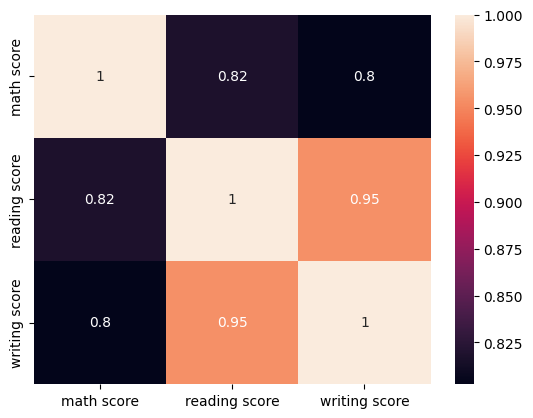

In [32]:
# releationship analysis
corelaction = student.corr(numeric_only=True)
sns.heatmap(corelaction,xticklabels=corelaction.columns,yticklabels=corelaction.columns ,annot=True)

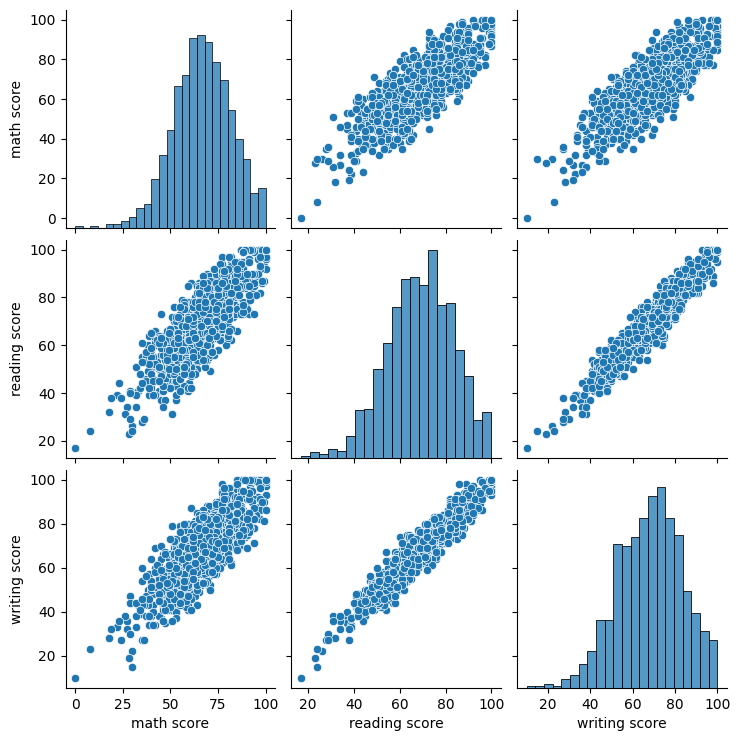

In [33]:
sns.pairplot(student)

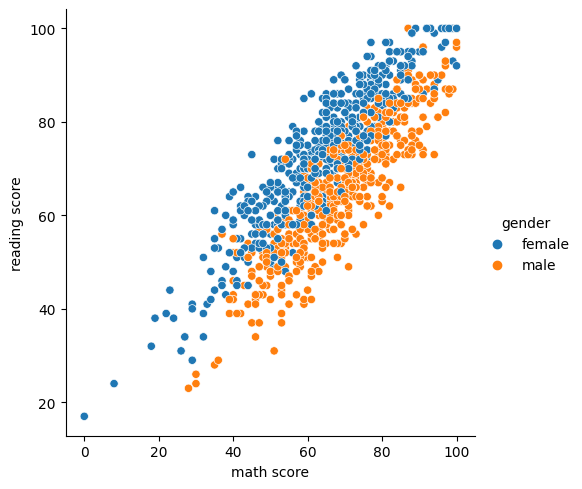

In [34]:
sns.relplot(x='math score', y= 'reading score', hue='gender', data=student)

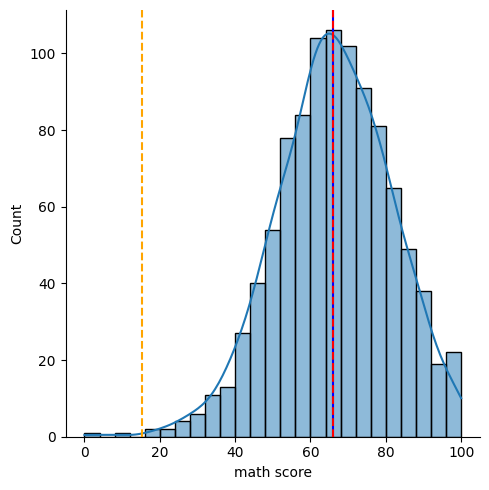

In [39]:
sns.displot(student['math score'], kde=True)
mean     =student['math score'].mean()
median   =student['math score'].median()
variance =student['math score'].var()
std      =student['math score'].std()

plt.axvline(x=median, color = 'blue')
plt.axvline(x=mean, color = "red", linestyle='--')
# plt.axvline(x=variance, color = "yellow", linestyle='--')
# plt.axvline(x=std, color = "orange", linestyle='--')

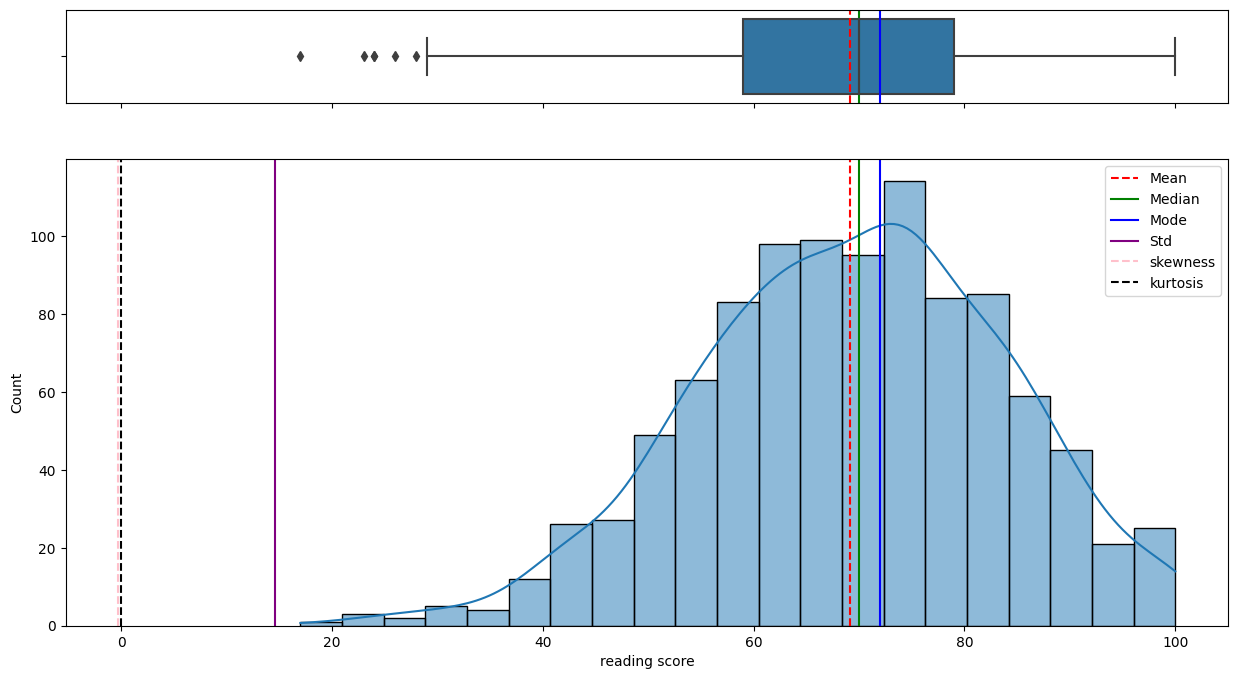

In [50]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)}, figsize=(15, 8))
mean = student['reading score'].mean()
median = student['reading score'].median()
variance = student['reading score'].var()
std = student['reading score'].std()
skewness = student['reading score'].skew()
kurtosis = student['reading score'].kurt()
mode = student['reading score'].mode().values[0]

sns.boxplot(data=student, x="reading score", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(x="reading score",
             data=student,
             ax=ax_hist,
             kde=True)
             
ax_hist.ticklabel_format(style='plain', useOffset=True, axis='x')
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
# ax_hist.axvline(variance, color='y', linestyle='-', label="variance")
ax_hist.axvline(std, color='purple', linestyle='-', label="Std")
ax_hist.axvline(skewness, color='pink', linestyle='--', label="skewness")
ax_hist.axvline(kurtosis, color='black', linestyle='--', label="kurtosis")

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

In [48]:
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
# If the skewness is less than -1 or greater than 1, the data are highly skewed

print(skewness)

-0.25910451810923063


In [46]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


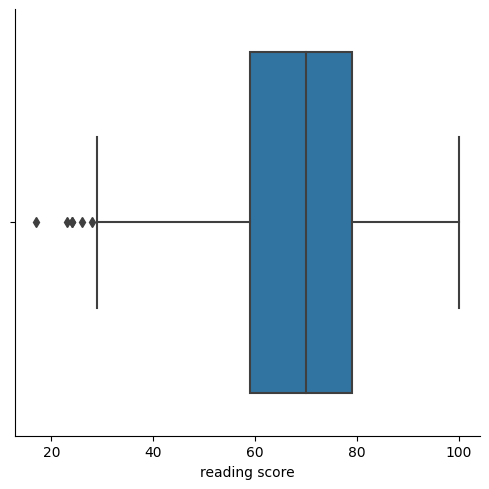

In [52]:
sns.catplot(x='reading score', kind='box', data=student)